In [ ]:
# Significados das colunas do dataset de jogadores de futebol
player_columns_meaning = {
    "Name": "Nome do jogador",
    "Nationality": "Nacionalidade do jogador",
    "National_Position": "Posição na seleção nacional",
    "National_Kit": "Número da camisa na seleção nacional",
    "Club": "Clube em que o jogador atua",
    "Club_Position": "Posição no clube",
    "Club_Kit": "Número da camisa no clube",
    "Club_Joining": "Ano de ingresso no clube",
    "Contract_Expiry": "Ano de expiração do contrato",
    "Rating": "Avaliação geral do jogador (atributo global)",
    "Height": "Altura do jogador (em cm)",
    "Weight": "Peso do jogador (em kg)",
    "Preffered_Foot": "Pé preferido (Direito ou Esquerdo)",
    "Birth_Date": "Data de nascimento",
    "Age": "Idade atual",
    "Preffered_Position": "Posição preferida do jogador",
    "Work_Rate": "Nível de esforço ofensivo/defensivo (ex: Medium/High)",
    "Weak_foot": "Habilidade com o pé não dominante (1 a 5)",
    "Skill_Moves": "Habilidade em dribles especiais (1 a 5)",
    "Ball_Control": "Controle de bola",
    "Dribbling": "Habilidade em driblar",
    "Marking": "Marcação defensiva",
    "Sliding_Tackle": "Desarme deslizante",
    "Standing_Tackle": "Desarme em pé",
    "Aggression": "Nível de agressividade",
    "Reactions": "Reações a jogadas",
    "Attacking_Position": "Posicionamento ofensivo",
    "Interceptions": "Intercepções",
    "Vision": "Visão de jogo",
    "Composure": "Calma em situações de pressão",
    "Crossing": "Precisão em cruzamentos",
    "Short_Pass": "Habilidade em passes curtos",
    "Long_Pass": "Habilidade em passes longos",
    "Acceleration": "Aceleração",
    "Speed": "Velocidade máxima",
    "Stamina": "Resistência física",
    "Strength": "Força física",
    "Balance": "Equilíbrio corporal",
    "Agility": "Agilidade",
    "Jumping": "Capacidade de salto",
    "Heading": "Habilidade em cabeceio",
    "Shot_Power": "Potência de chute",
    "Finishing": "Finalização",
    "Long_Shots": "Chutes de longa distância",
    "Curve": "Efeito no chute",
    "Freekick_Accuracy": "Precisão em cobranças de falta",
    "Penalties": "Precisão em pênaltis",
    "Volleys": "Habilidade em voleios",
    "GK_Positioning": "Posicionamento do goleiro",
    "GK_Diving": "Mergulho do goleiro",
    "GK_Kicking": "Chute do goleiro",
    "GK_Handling": "Segurada da bola pelo goleiro",
    "GK_Reflexes": "Reflexos do goleiro"
}

Clusterização de Jogadores

Objetivo: Agrupar jogadores com características semelhantes com base em atributos técnicos e físicos (como velocidade, drible, finalização, força, defesa, etc.).

Tipo de problema: Agrupamento não supervisionado (clustering).

Exemplo de uso: Identificar perfis de jogadores — goleiros, defensores, meio-campistas e atacantes — e facilitar análise de talentos ou estratégias de recrutamento.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Carregar CSV
df = pd.read_csv(
    r'/home/wallingson12/Github/Data science and ML/Análise Jogadores/FullData.csv',
    delimiter=","
)

# Mostrar as primeiras linhas bonitinho
display(df.head(10))

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,...,90,86,85,76,76,5,15,11,15,6
8,Zlatan Ibrahimović,Sweden,NaN,NaN,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,...,88,82,82,91,93,9,13,10,15,12
9,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,07/26/2011,2019.0,89,...,17,19,11,27,12,86,84,69,91,89


# Verificando dados faltantes

- Pelo que foi apurado nenhuma colunas que pretendemos utilizar tem dados faltando

In [54]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

missing = df.isnull().sum()
missing_cols = missing[missing > 0].sort_values(ascending=False)

print("Colunas com valores ausentes:\n")
print(missing_cols)
print("\nTotal de colunas com faltas:", len(missing_cols))

Colunas com valores ausentes:

National_Position    16513
National_Kit         16513
Club_Position            1
Club_Kit                 1
Club_Joining             1
Contract_Expiry          1
dtype: int64

Total de colunas com faltas: 6


# Remover colunas com Nan

In [55]:
df = df.dropna()

# Confirmar que não restaram valores nulos

In [56]:
faltantes_restantes = df.isnull().sum().sum()
if faltantes_restantes == 0:
    print("\n✅ Todos os valores ausentes foram tratados com sucesso.")
else:
    print(f"\n⚠️ Ainda restam {faltantes_restantes} valores ausentes.")


✅ Todos os valores ausentes foram tratados com sucesso.


## Tratando diferenças de escala

#### Como podemos ver essas colunas estão em escalas bem diferentes

- Skill_Moves
- Weak_foot
- Skill_Moves
- Height
- Weight

In [9]:
df["Work_Rate"].unique()

array(['High / Low', 'Medium / Medium', 'High / Medium', 'Medium / Low',
       'High / High', 'Medium / High', 'Low / High', 'Low / Medium',
       'Low / Low'], dtype=object)

In [10]:
df["Weak_foot"].unique()

array([4, 5, 3, 2, 1])

In [11]:
df["Skill_Moves"].unique()

array([5, 4, 1, 3, 2])

In [44]:
df["Height"].unique()
df["Weight"].unique()

array(['80 kg', '72 kg', '68 kg', '85 kg', '92 kg', '82 kg', '79 kg',
       '74 kg', '91 kg', '90 kg', '76 kg', '75 kg', '70 kg', '67 kg',
       '62 kg', '78 kg', '73 kg', '84 kg', '81 kg', '87 kg', '60 kg',
       '83 kg', '71 kg', '65 kg', '88 kg', '86 kg', '94 kg', '77 kg',
       '61 kg', '66 kg', '59 kg', '93 kg', '69 kg', '64 kg', '63 kg',
       '95 kg', '58 kg', '98 kg', '96 kg', '97 kg', '89 kg', '55 kg'],
      dtype=object)

# Atribuindo novos valores para adequar essas colunas

In [57]:
# ============================
# 0️⃣ Tratar Height e Weight
# ============================

# Height: remover "cm" e converter para float
df["Height"] = df["Height"].str.replace("cm", "").str.strip()
df["Height"] = pd.to_numeric(df["Height"], errors='coerce')

# Weight: remover "kg" e converter para float
df["Weight"] = df["Weight"].str.replace("kg", "").str.strip()
df["Weight"] = pd.to_numeric(df["Weight"], errors='coerce')

# Preencher possíveis NaNs com a média da coluna
df["Height"] = df["Height"].fillna(df["Height"].mean())
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())

# ============================
# 1️⃣ Mapeamento Weak_foot e Skill_Moves
# ============================
mapa_habilidades = {1:50, 2:60, 3:70, 4:80, 5:90}
df["Weak_foot"] = df["Weak_foot"].map(mapa_habilidades)
df["Skill_Moves"] = df["Skill_Moves"].map(mapa_habilidades)

# ============================
# 2️⃣ Mapeamento Work_Rate direto para cada combinação
# ============================
mapa_work_rate = {
    'High / Low': 75,
    'Medium / Medium': 66,
    'High / Medium': 82,
    'Medium / Low': 58,
    'High / High': 99,
    'Medium / High': 82,
    'Low / High': 75,
    'Low / Medium': 58,
    'Low / Low': 33
}

df["Work_Rate"] = df["Work_Rate"].map(mapa_work_rate)

# Limpeza e padronização

 - Selecionei apenas as colunas que sejam de atributos técnicos ou físicos dos jogadores

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Converter Height e Weight para numérico (float), sem usar .str.replace
df["Height"] = pd.to_numeric(df["Height"], errors='coerce')
df["Weight"] = pd.to_numeric(df["Weight"], errors='coerce')

# Colunas técnicas consideradas
atributos_jogador = [
    # Técnicos
    "Ball_Control", "Dribbling", "Crossing", "Short_Pass", "Long_Pass",
    "Finishing", "Long_Shots", "Curve", "Freekick_Accuracy", "Penalties", "Volleys", "Heading", "Shot_Power",

    # Físicos
    "Height", "Weight", "Acceleration", "Speed", "Stamina", "Strength",
    "Balance", "Agility", "Jumping",

    # Mentais e defensivos
    "Vision", "Composure", "Reactions", "Attacking_Position",
    "Interceptions", "Aggression", "Marking", "Sliding_Tackle", "Standing_Tackle",

    # Goleiro
    "GK_Positioning", "GK_Diving", "GK_Kicking", "GK_Handling", "GK_Reflexes", 
    
    "Weak_foot", "Work_Rate", "Skill_Moves", "Preffered_Position"
]

# Selecionar apenas colunas existentes no df original
colunas_validas = [col for col in atributos_jogador if col in df.columns]

# Criar DataFrame 'atributos' mantendo Name + colunas válidas
atributos = df[['Name'] + colunas_validas].copy()

# Cálculo de médias por grupo e geral

# Podemos análizar quais jogadores possuem a melhor média de atributos considerandos todos atributos

In [59]:
# Colunas válidas para média (numéricas e existentes, exceto Preffered_Position)
colunas_para_media = [col for col in atributos_jogador if col in atributos.columns and col != "Preffered_Position"]

# Calcular a média geral por jogador
atributos["Media_Geral"] = atributos[colunas_para_media].mean(axis=1)

# Ordenar do maior para o menor
atributos_ordenado = atributos.sort_values("Media_Geral", ascending=False)

# Mostrar as 10 maiores médias gerais
print(atributos_ordenado[["Name", "Media_Geral"]].head(10))

                  Name  Media_Geral
3          Luis Suárez    73.820513
37        Arturo Vidal    73.717949
56    Radja Nainggolan    73.205128
45         David Alaba    72.974359
7          Gareth Bale    72.820513
0    Cristiano Ronaldo    72.282051
107       Sami Khedira    71.282051
145      Ander Herrera    71.076923
227  Ricardo Rodríguez    71.076923
57             Marcelo    70.974359


# Há necessidade de normalização?

In [60]:
print(atributos[colunas_para_media].describe())

       Ball_Control    Dribbling    Crossing   Short_Pass    Long_Pass  \
count   1075.000000  1075.000000  1075.00000  1075.000000  1075.000000   
mean      64.111628    60.505116    55.60093    64.337674    58.966512   
std       19.283502    21.556057    20.92186    17.000614    16.967622   
min       12.000000     7.000000     9.00000    11.000000    12.000000   
25%       60.000000    54.000000    44.00000    60.500000    50.000000   
50%       70.000000    67.000000    62.00000    69.000000    63.000000   
75%       76.000000    75.000000    71.00000    75.500000    71.000000   
max       95.000000    97.000000    90.00000    92.000000    93.000000   

         Finishing   Long_Shots        Curve  Freekick_Accuracy    Penalties  \
count  1075.000000  1075.000000  1075.000000        1075.000000  1075.000000   
mean     51.131163    54.405581    53.191628          49.273488    53.766512   
std      22.143650    21.749787    21.225984          20.590618    18.003269   
min       5.0

# Normalizando

## Tratamento de NaNs antes da normalização

### Mesmo após a normalização, podem existir NaNs gerados por:
- Conversão de strings para numérico (ex: Height, Weight)
- Mapeamento de colunas categóricas para números (ex: Weak_foot, Skill_Moves, Work_Rate)
   
Esses NaNs precisam ser identificados antes de aplicar KMeans ou PCA,
pois esses algoritmos não aceitam valores faltantes.
Aqui verificamos quais colunas ainda têm NaNs e visualizamos sua distribuição.

In [61]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ---------------------------
# 1️⃣ Normalizar os atributos
# ---------------------------
scaler = StandardScaler()
atributos_normalizados = scaler.fit_transform(atributos[colunas_para_media])

# Converter de volta para DataFrame mantendo índices e nomes das colunas
atributos_norm_df = pd.DataFrame(
    atributos_normalizados,
    columns=colunas_para_media,
    index=atributos.index
)

# Adicionar coluna 'Name' novamente
atributos_norm_df["Name"] = atributos["Name"]

# ---------------------------
# 2️⃣ Estatísticas básicas
# ---------------------------
print("Estatísticas descritivas dos atributos normalizados:")
display(atributos_norm_df[colunas_para_media].describe())

# ---------------------------
# 3️⃣ Verificar NaNs
# ---------------------------
nan_por_coluna = atributos_norm_df.isna().sum()
nan_presentes = nan_por_coluna[nan_por_coluna > 0]

if nan_presentes.empty:
    print("✅ Nenhum NaN encontrado nos atributos normalizados.")
else:
    print("⚠️ A seguir as colunas com NaNs e a quantidade de valores faltantes:")
    print(nan_presentes)

Estatísticas descritivas dos atributos normalizados:


,Ball_Control,Dribbling,Crossing,Short_Pass,Long_Pass,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,...,Sliding_Tackle,Standing_Tackle,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Weak_foot,Work_Rate,Skill_Moves
count,1.075000e+03,1075.000000,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,...,1.075000e+03,1075.000000,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03,1.075000e+03
mean,-3.172656e-16,0.000000,-1.321940e-16,1.057552e-16,1.057552e-16,9.253580e-17,-1.057552e-16,1.454134e-16,1.586328e-16,-1.454134e-16,...,-7.270670e-17,0.000000,-3.635335e-17,-2.313395e-17,-1.321940e-17,-3.965820e-17,-5.287760e-17,-8.328222e-16,-4.626790e-16,-6.213118e-16
std,1.000465e+00,1.000465,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,...,1.000465e+00,1.000465,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00
min,-2.703652e+00,-2.483294,-2.228417e+00,-3.138857e+00,-2.769296e+00,-2.084238e+00,-2.226602e+00,-2.082928e+00,-2.054002e+00,-2.432163e+00,...,-1.682621e+00,-1.829838,-8.382018e-01,-8.246717e-01,-8.556350e-01,-8.361901e-01,-8.076599e-01,-2.887992e+00,-3.655241e+00,-1.640583e+00
25%,-2.133192e-01,-0.301917,-5.547466e-01,-2.258425e-01,-5.286943e-01,-7.739978e-01,-6.626403e-01,-7.631761e-01,-7.907030e-01,-6.538806e-01,...,-1.032741e+00,-0.938714,-4.651664e-01,-5.052536e-01,-5.126791e-01,-5.051368e-01,-4.963532e-01,-1.824657e-01,-8.005898e-01,-5.236568e-01
50%,3.055002e-01,0.301442,3.059980e-01,2.743722e-01,2.378274e-01,2.199774e-01,3.493346e-01,2.737718e-01,1.810653e-01,1.796892e-01,...,3.076347e-01,0.316961,-3.252782e-01,-3.227290e-01,-3.167044e-01,-3.632568e-01,-3.629360e-01,-1.824657e-01,-2.204861e-02,-5.236568e-01
75%,6.167918e-01,0.672740,7.363704e-01,6.568893e-01,7.095331e-01,8.073264e-01,7.633244e-01,7.451118e-01,8.127146e-01,7.354024e-01,...,8.762791e-01,0.843535,-1.853899e-01,-1.858355e-01,-1.697233e-01,-2.213768e-01,-2.295189e-01,1.170297e+00,5.834834e-01,5.932699e-01
max,1.602549e+00,1.693810,1.644934e+00,1.627894e+00,2.006724e+00,1.982024e+00,1.683302e+00,1.829194e+00,2.027425e+00,2.013543e+00,...,1.688628e+00,1.613142,3.358446e+00,3.190870e+00,3.749772e+00,3.420210e+00,3.150382e+00,2.523061e+00,2.054061e+00,2.827123e+00


✅ Nenhum NaN encontrado nos atributos normalizados.


# Clustering KMeans

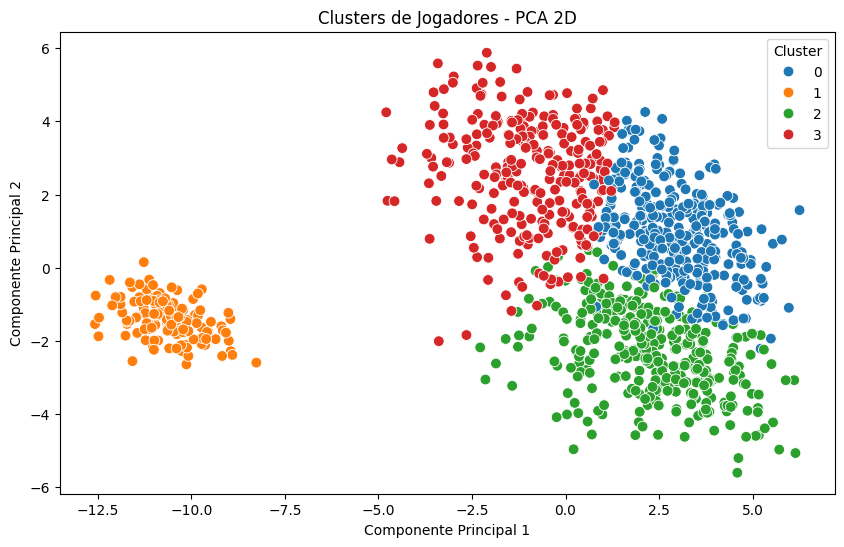

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Selecionar apenas atributos numéricos usados no clustering
X = atributos_norm_df.select_dtypes(include='number').drop(columns=['Cluster','PC1','PC2'], errors='ignore')

# Rodar KMeans
k = 4  # ajuste conforme desejar
kmeans = KMeans(n_clusters=k, random_state=42)
atributos_norm_df['Cluster'] = kmeans.fit_predict(X)

# PCA para visualização 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
atributos_norm_df['PC1'] = X_pca[:, 0]
atributos_norm_df['PC2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    data=atributos_norm_df,
    s=60
)
plt.title('Clusters de Jogadores - PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

# Quais são as características mais importantes em cada cluster?

In [ ]:
## Aparentemente o modelo identificou os seguintes tipos de jogadores

| Cluster | Perfil predominante     | Principais atributos                                               |
| ------- | ----------------------- | ------------------------------------------------------------------ |
| 0       | Defensores              | Interceptions, Standing_Tackle, Sliding_Tackle, Marking, Long_Pass |
| 1       | Goleiros                | GK_Diving, GK_Reflexes, GK_Positioning, GK_Handling, GK_Kicking    |
| 2       | Atacantes/Finalizadores | Finishing, Skill_Moves, Volleys, Marking, Attacking_Position       |
| 3       | Meio-campo              | Vision, Marking, Sliding_Tackle, Standing_Tackle, Interceptions    |

In [66]:
import pandas as pd
import numpy as np

# Selecionar apenas colunas numéricas relevantes
numericas = list(atributos_norm_df.select_dtypes(include='number').columns)
numericas = [c for c in numericas if c not in ['Cluster','PC1','PC2']]

clusters = atributos_norm_df['Cluster'].unique()
importances = {}

# Calcular top 5 atributos que mais diferenciam cada cluster
for c in clusters:
    mean_in = atributos_norm_df.loc[atributos_norm_df['Cluster']==c, numericas].mean()
    mean_out = atributos_norm_df.loc[atributos_norm_df['Cluster']!=c, numericas].mean()
    diff = (mean_in - mean_out).abs()
    top_features = diff.sort_values(ascending=False).head(5)
    importances[c] = top_features

# Mostrar resultado direto
for c, feats in importances.items():
    print(f"\nCluster {c} - Top 5 Atributos:")
    print(feats.to_string())


Cluster 2 - Top 5 Atributos:
Finishing             1.381389
Skill_Moves           1.263404
Volleys               1.199624
Marking               1.179147
Attacking_Position    1.164167

Cluster 1 - Top 5 Atributos:
GK_Diving         2.893177
GK_Reflexes       2.891221
GK_Positioning    2.888708
GK_Handling       2.883363
GK_Kicking        2.878748

Cluster 0 - Top 5 Atributos:
Interceptions      1.248521
Standing_Tackle    1.218938
Sliding_Tackle     1.216707
Marking            1.179331
Long_Pass          1.129114

Cluster 3 - Top 5 Atributos:
Vision             1.100871
Marking            1.058110
Sliding_Tackle     1.007353
Standing_Tackle    0.981271
Interceptions      0.895312


# Avaliação número de K *Método cotovelo)

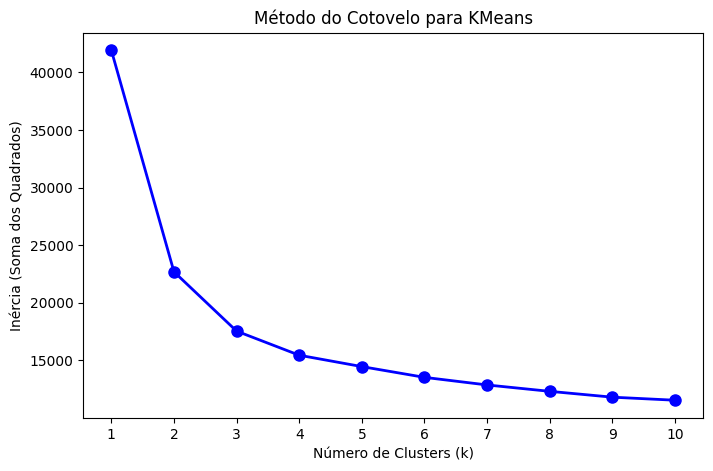

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecionar apenas colunas numéricas usadas no clustering
X = atributos_norm_df.select_dtypes(include='number').drop(columns=['Cluster','PC1','PC2'], errors='ignore')

# Testar vários valores de k
inertia = []
K = range(1, 11)  # testa de 1 a 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot do método do cotovelo
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos Quadrados)')
plt.title('Método do Cotovelo para KMeans')
plt.xticks(K)
plt.show()

# Testando com mais k

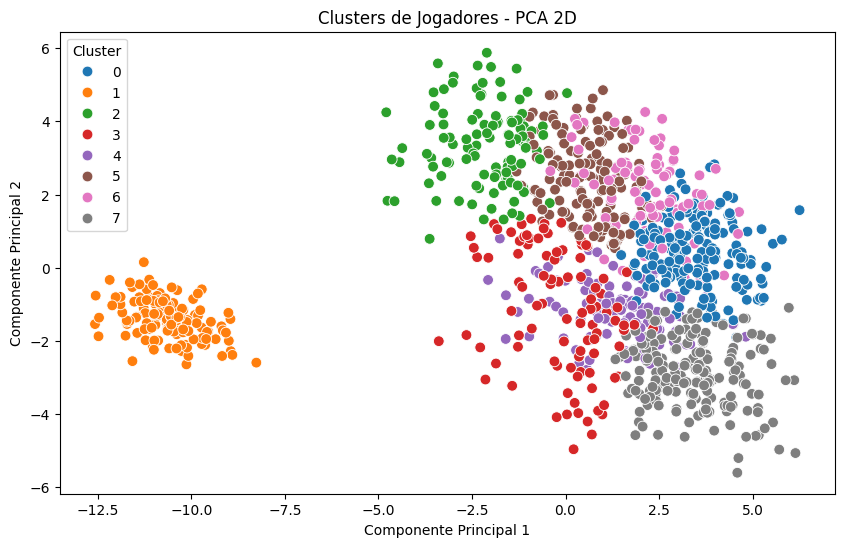

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Selecionar apenas atributos numéricos usados no clustering
X = atributos_norm_df.select_dtypes(include='number').drop(columns=['Cluster','PC1','PC2'], errors='ignore')

# Rodar KMeans
k = 8  # ajuste conforme desejar
kmeans = KMeans(n_clusters=k, random_state=42)
atributos_norm_df['Cluster'] = kmeans.fit_predict(X)

# PCA para visualização 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
atributos_norm_df['PC1'] = X_pca[:, 0]
atributos_norm_df['PC2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    data=atributos_norm_df,
    s=60
)
plt.title('Clusters de Jogadores - PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [86]:
import pandas as pd
import numpy as np

# Selecionar apenas colunas numéricas relevantes
numericas = list(atributos_norm_df.select_dtypes(include='number').columns)
numericas = [c for c in numericas if c not in ['Cluster','PC1','PC2']]

clusters = atributos_norm_df['Cluster'].unique()
importances = {}

# Calcular top 5 atributos que mais diferenciam cada cluster
for c in clusters:
    mean_in = atributos_norm_df.loc[atributos_norm_df['Cluster']==c, numericas].mean()
    mean_out = atributos_norm_df.loc[atributos_norm_df['Cluster']!=c, numericas].mean()
    diff = (mean_in - mean_out).abs()
    top_features = diff.sort_values(ascending=False).head(5)
    importances[c] = top_features

# Mostrar resultado direto
for c, feats in importances.items():
    print(f"\nCluster {c} - Top 5 Atributos:")
    print(feats.to_string())


Cluster 7 - Top 5 Atributos:
Skill_Moves     1.508885
Agility         1.304409
Finishing       1.185667
Balance         1.151681
Acceleration    1.139575

Cluster 1 - Top 5 Atributos:
GK_Diving         2.893177
GK_Reflexes       2.891221
GK_Positioning    2.888708
GK_Handling       2.883363
GK_Kicking        2.878748

Cluster 4 - Top 5 Atributos:
Finishing         1.206244
Sliding_Tackle    1.093743
Marking           1.062279
Volleys           1.061147
Penalties         1.017035

Cluster 6 - Top 5 Atributos:
Interceptions      1.082442
Standing_Tackle    1.051848
Long_Pass          0.995198
Sliding_Tackle     0.974665
Marking            0.973843

Cluster 0 - Top 5 Atributos:
Stamina           1.046789
Work_Rate         1.030255
Interceptions     1.002322
Sliding_Tackle    0.998991
Crossing          0.978173

Cluster 5 - Top 5 Atributos:
Marking            1.157526
Sliding_Tackle     1.125057
Standing_Tackle    1.074341
Interceptions      1.041933
Aggression         0.707536

Cluster 2

In [ ]:
| Cluster | Perfil predominante         | Principais atributos                                                |
| ------- | --------------------------- | ------------------------------------------------------------------- |
| 0       | Defensores versáteis        | Stamina, Work_Rate, Interceptions, Sliding_Tackle, Crossing         |
| 1       | Goleiros                    | GK_Diving, GK_Reflexes, GK_Positioning, GK_Handling, GK_Kicking     |
| 2       | Meio-campistas criativos    | Vision, Agility, Attacking_Position, Finishing, Long_Shots          |
| 3       | Defensores físicos/robustos | Strength, Reactions, Jumping, Weight, Height                        |
| 4       | Atacantes versáteis         | Finishing, Sliding_Tackle, Marking, Volleys, Penalties              |
| 5       | Defensores agressivos       | Marking, Sliding_Tackle, Standing_Tackle, Interceptions, Aggression |
| 6       | Defensores táticos          | Interceptions, Standing_Tackle, Long_Pass, Sliding_Tackle, Marking  |
| 7       | Atacantes ágeis/dribladores | Skill_Moves, Agility, Finishing, Balance, Acceleration              |

# Distribuição

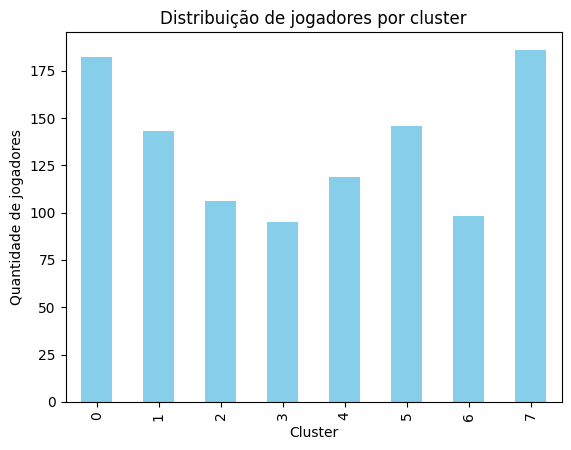

In [87]:
import matplotlib.pyplot as plt

atributos_norm_df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Quantidade de jogadores")
plt.title("Distribuição de jogadores por cluster")
plt.show()

In [97]:
import pandas as pd

# Lista para armazenar os top jogadores por cluster
top_jogadores = []

for c, top_feats in importances.items():
    # Atributo mais importante do cluster (o primeiro do top_feats)
    atributo_top = top_feats.index[0]
    
    # Subset dos jogadores do cluster
    subset = atributos_norm_df[atributos_norm_df['Cluster']==c].copy()
    
    # Pegar o jogador com maior valor no atributo mais importante
    idx_top = subset[atributo_top].idxmax()
    
    # Recuperar o nome do jogador do DataFrame original
    nome_jogador = df.loc[idx_top, 'Name']  # ajuste para o nome correto da coluna
    
    top_jogadores.append({'Cluster': c, 'Top_Atributo': atributo_top, 'Top_Jogador': nome_jogador})

# Criar DataFrame final
df_top_jogadores = pd.DataFrame(top_jogadores).sort_values('Cluster').reset_index(drop=True)
df_top_jogadores

,Cluster,Top_Atributo,Top_Jogador
0,0,Stamina,Radja Nainggolan
1,1,GK_Diving,Manuel Neuer
2,2,Vision,Ádám Pintér
3,3,Strength,Oliver Burke
4,4,Finishing,Gonzalo Higuaín
5,5,Marking,Giorgio Chiellini
6,6,Interceptions,Leonardo Bonucci
7,7,Skill_Moves,Cristiano Ronaldo


# Análise de Clusters de Jogadores

Neste notebook, analisamos os **clusters de jogadores** a partir de atributos normalizados de desempenho, utilizando técnicas de agrupamento. O objetivo é identificar **perfis de jogadores** e os atributos que mais diferenciam cada grupo.

---

## 1️⃣ Identificação de atributos discriminativos

Para cada cluster, calculamos a diferença média absoluta de cada atributo em relação aos demais clusters, selecionando os **top 5 atributos que mais diferenciam cada grupo**. Isso nos permite entender quais características definem cada tipo de jogador.

---

## 2️⃣ Perfis de jogadores por cluster

Após análise, identificamos os seguintes **8 clusters**:

| Cluster | Perfil predominante          | Principais atributos                                               |
| ------- | ---------------------------- | ------------------------------------------------------------------ |
| 0       | Defensores versáteis         | Stamina, Work_Rate, Interceptions, Sliding_Tackle, Crossing       |
| 1       | Goleiros                     | GK_Diving, GK_Reflexes, GK_Positioning, GK_Handling, GK_Kicking  |
| 2       | Meio-campistas criativos     | Vision, Agility, Attacking_Position, Finishing, Long_Shots        |
| 3       | Defensores físicos/robustos  | Strength, Reactions, Jumping, Weight, Height                      |
| 4       | Atacantes versáteis           | Finishing, Sliding_Tackle, Marking, Volleys, Penalties            |
| 5       | Defensores agressivos        | Marking, Sliding_Tackle, Standing_Tackle, Interceptions, Aggression |
| 6       | Defensores táticos           | Interceptions, Standing_Tackle, Long_Pass, Sliding_Tackle, Marking |
| 7       | Atacantes ágeis/dribladores   | Skill_Moves, Agility, Finishing, Balance, Acceleration            |

---

## 3️⃣ Conclusões gerais

1. **Goleiros (Cluster 1)**: Totalmente separados, claramente definidos pelos atributos de goleiro.  
2. **Defensores (Clusters 0, 3, 5, 6)**: Diferentes estilos defensivos foram identificados:  
   - Versáteis (0), físicos/robustos (3), agressivos/marcadores (5), táticos/interceptadores (6).  
3. **Meio-campistas criativos (Cluster 2)**: Destacam-se por visão, agilidade e capacidade de criação de jogadas.  
4. **Atacantes (Clusters 4, 7)**: Subtipos de atacantes foram diferenciados:  
   - Versáteis (4) e ágeis/dribladores (7), mostrando granularidade dentro da mesma posição.  
5. **Estrutura geral**: O modelo separa claramente goleiros, jogadores ofensivos e defensores, permitindo análise de perfis detalhada.  

---

## 4️⃣ Insights práticos

- Os clusters podem ser usados para **scouting, treinamento e análise de elenco**.  
- A diferenciação entre defensores físicos, táticos e versáteis ajuda em **decisões táticas e de escalação**.  
- Subtipos de atacantes e meio-campistas fornecem informações sobre **estilo de jogo e especializações individuais**.